In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})
sns.set_context("poster", rc={"lines.linewidth": 5})

In [2]:
!pwd

/Users/nicholasbeaudoin/Desktop/Projects/PGA Tour Project/PGA-Tour-Analytics/notebooks/analysis


### Import data

In [19]:
df_dist = pd.read_csv('../../../data/Off the tee_Driving Distance.csv')
df_acc = pd.read_csv('../../../data/Off the tee_Driving Accuracy Percentage.csv')
df_fin = pd.read_csv('../../../data/Finish_ing Average.csv')

# Drop first column
df_dist.drop('Unnamed: 0', axis = 1, inplace=True)
df_acc.drop('Unnamed: 0', axis = 1, inplace=True)
df_fin.drop('Unnamed: 0', axis = 1, inplace=True)

### Merge data 

In [20]:
df_dist.head()

,PLAYER NAME,ROUNDS,AVG.,TOTAL DISTANCE,TOTAL DRIVES,YEAR,Tournament
0,Dan Pohl,4,282.6,"2,261",8,1980,Pensacola Open
1,Stanton Altgelt,4,280.1,"2,241",8,1980,Pensacola Open
2,Gary Hallberg,4,276.9,"2,215",8,1980,Pensacola Open
3,Dave Eichelberger,4,275.4,"2,203",8,1980,Pensacola Open
4,George Cadle,4,275.3,"2,202",8,1980,Pensacola Open


In [21]:
df_acc.head()

,PLAYER NAME,ROUNDS,%,FAIRWAYS HIT,POSSIBLE FAIRWAYS,YEAR,Tournament
0,Mike Reid,4,75.00,42,56,1980,Pensacola Open
1,Miller Barber,4,71.43,40,56,1980,Pensacola Open
2,Don Pooley,4,66.07,37,56,1980,Pensacola Open
3,Rik Massengale,4,66.07,37,56,1980,Pensacola Open
4,Lonnie Nielsen,4,64.29,36,56,1980,Pensacola Open


In [22]:
df_fin.head()

,PLAYER NAME,ROUNDS,AVG,TOTAL STROKES,TOTAL ADJUSTMENT,TOTAL ROUNDS,YEAR,Tournament,RANK THIS WEEK
0,Dan Halldorson,4,68.75,275,NaN,4,1980,Pensacola Open,1
1,Gary Hallberg,4,69.25,277,NaN,4,1980,Pensacola Open,2
2,Mike Sullivan,4,69.25,277,NaN,4,1980,Pensacola Open,2
3,Mike Gove,4,69.50,278,NaN,4,1980,Pensacola Open,4
4,Dave Eichelberger,4,69.50,278,NaN,4,1980,Pensacola Open,4


In [23]:
# Merge distance and accuracy on player, tournament and year
df = pd.merge(df_dist, df_acc, on=['PLAYER NAME', 'Tournament', 'YEAR'])
df.head()

,PLAYER NAME,ROUNDS_x,AVG.,TOTAL DISTANCE,TOTAL DRIVES,YEAR,Tournament,ROUNDS_y,%,FAIRWAYS HIT,POSSIBLE FAIRWAYS
0,Dan Pohl,4,282.6,"2,261",8,1980,Pensacola Open,4,33.93,19,56
1,Stanton Altgelt,4,280.1,"2,241",8,1980,Pensacola Open,4,42.86,24,56
2,Gary Hallberg,4,276.9,"2,215",8,1980,Pensacola Open,4,55.36,31,56
3,Dave Eichelberger,4,275.4,"2,203",8,1980,Pensacola Open,4,50.00,28,56
4,George Cadle,4,275.3,"2,202",8,1980,Pensacola Open,4,46.43,26,56


In [24]:
# Merge df to df_fin
df = pd.merge(df, df_fin, on=['PLAYER NAME', 'Tournament', 'YEAR'])
df.head()

,PLAYER NAME,ROUNDS_x,AVG.,TOTAL DISTANCE,TOTAL DRIVES,YEAR,Tournament,ROUNDS_y,%,FAIRWAYS HIT,POSSIBLE FAIRWAYS,ROUNDS,AVG,TOTAL STROKES,TOTAL ADJUSTMENT,TOTAL ROUNDS,RANK THIS WEEK
0,Dan Pohl,4,282.6,"2,261",8,1980,Pensacola Open,4,33.93,19,56,4,71.25,285,NaN,4,34
1,Stanton Altgelt,4,280.1,"2,241",8,1980,Pensacola Open,4,42.86,24,56,4,71.00,284,NaN,4,27
2,Gary Hallberg,4,276.9,"2,215",8,1980,Pensacola Open,4,55.36,31,56,4,69.25,277,NaN,4,2
3,Dave Eichelberger,4,275.4,"2,203",8,1980,Pensacola Open,4,50.00,28,56,4,69.50,278,NaN,4,4
4,George Cadle,4,275.3,"2,202",8,1980,Pensacola Open,4,46.43,26,56,4,70.75,283,NaN,4,24


In [25]:
# Clean up the dataframe (drop columns)
df.drop(['ROUNDS', 'ROUNDS_x','ROUNDS_y', 'TOTAL ADJUSTMENT', 'AVG'], axis = 1, inplace=True)

In [26]:
df.head()

,PLAYER NAME,AVG.,TOTAL DISTANCE,TOTAL DRIVES,YEAR,Tournament,%,FAIRWAYS HIT,POSSIBLE FAIRWAYS,TOTAL STROKES,TOTAL ROUNDS,RANK THIS WEEK
0,Dan Pohl,282.6,"2,261",8,1980,Pensacola Open,33.93,19,56,285,4,34
1,Stanton Altgelt,280.1,"2,241",8,1980,Pensacola Open,42.86,24,56,284,4,27
2,Gary Hallberg,276.9,"2,215",8,1980,Pensacola Open,55.36,31,56,277,4,2
3,Dave Eichelberger,275.4,"2,203",8,1980,Pensacola Open,50.00,28,56,278,4,4
4,George Cadle,275.3,"2,202",8,1980,Pensacola Open,46.43,26,56,283,4,24


In [27]:
# Rename features
df.rename(columns={'AVG.':'DRIVING_DIST', 
                  '%':'DRIVING_ACC'}, inplace=True)

In [28]:
df.head()

,PLAYER NAME,DRIVING_DIST,TOTAL DISTANCE,TOTAL DRIVES,YEAR,Tournament,DRIVING_ACC,FAIRWAYS HIT,POSSIBLE FAIRWAYS,TOTAL STROKES,TOTAL ROUNDS,RANK THIS WEEK
0,Dan Pohl,282.6,"2,261",8,1980,Pensacola Open,33.93,19,56,285,4,34
1,Stanton Altgelt,280.1,"2,241",8,1980,Pensacola Open,42.86,24,56,284,4,27
2,Gary Hallberg,276.9,"2,215",8,1980,Pensacola Open,55.36,31,56,277,4,2
3,Dave Eichelberger,275.4,"2,203",8,1980,Pensacola Open,50.00,28,56,278,4,4
4,George Cadle,275.3,"2,202",8,1980,Pensacola Open,46.43,26,56,283,4,24


In [29]:
# How many players?
len(df['PLAYER NAME'].unique())

2187

In [30]:
!pwd

/Users/nicholasbeaudoin/Desktop/Projects/PGA Tour Project/PGA-Tour-Analytics/notebooks/analysis


In [44]:
df.head()

,PLAYER NAME,DRIVING_DIST,TOTAL DISTANCE,TOTAL DRIVES,YEAR,Tournament,DRIVING_ACC,FAIRWAYS HIT,POSSIBLE FAIRWAYS,TOTAL STROKES,TOTAL ROUNDS,RANK THIS WEEK
0,Dan Pohl,282.6,"2,261",8,1980,Pensacola Open,33.93,19,56,285,4,34
1,Stanton Altgelt,280.1,"2,241",8,1980,Pensacola Open,42.86,24,56,284,4,27
2,Gary Hallberg,276.9,"2,215",8,1980,Pensacola Open,55.36,31,56,277,4,2
3,Dave Eichelberger,275.4,"2,203",8,1980,Pensacola Open,50.00,28,56,278,4,4
4,George Cadle,275.3,"2,202",8,1980,Pensacola Open,46.43,26,56,283,4,24


In [43]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [45]:
# Export cleaned data
df.to_csv('../../../data/master_file.csv', )

### Distance over time

In [4]:
# Import cleaned data
df = pd.read_csv('../../../data/master_file.csv')
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
df.head()

,PLAYER NAME,DRIVING_DIST,TOTAL DISTANCE,TOTAL DRIVES,YEAR,Tournament,DRIVING_ACC,FAIRWAYS HIT,POSSIBLE FAIRWAYS,TOTAL STROKES,TOTAL ROUNDS,RANK THIS WEEK
0,Dan Pohl,282.6,"2,261",8,1980,Pensacola Open,33.93,19,56,285,4,34
1,Stanton Altgelt,280.1,"2,241",8,1980,Pensacola Open,42.86,24,56,284,4,27
2,Gary Hallberg,276.9,"2,215",8,1980,Pensacola Open,55.36,31,56,277,4,2
3,Dave Eichelberger,275.4,"2,203",8,1980,Pensacola Open,50.00,28,56,278,4,4
4,George Cadle,275.3,"2,202",8,1980,Pensacola Open,46.43,26,56,283,4,24


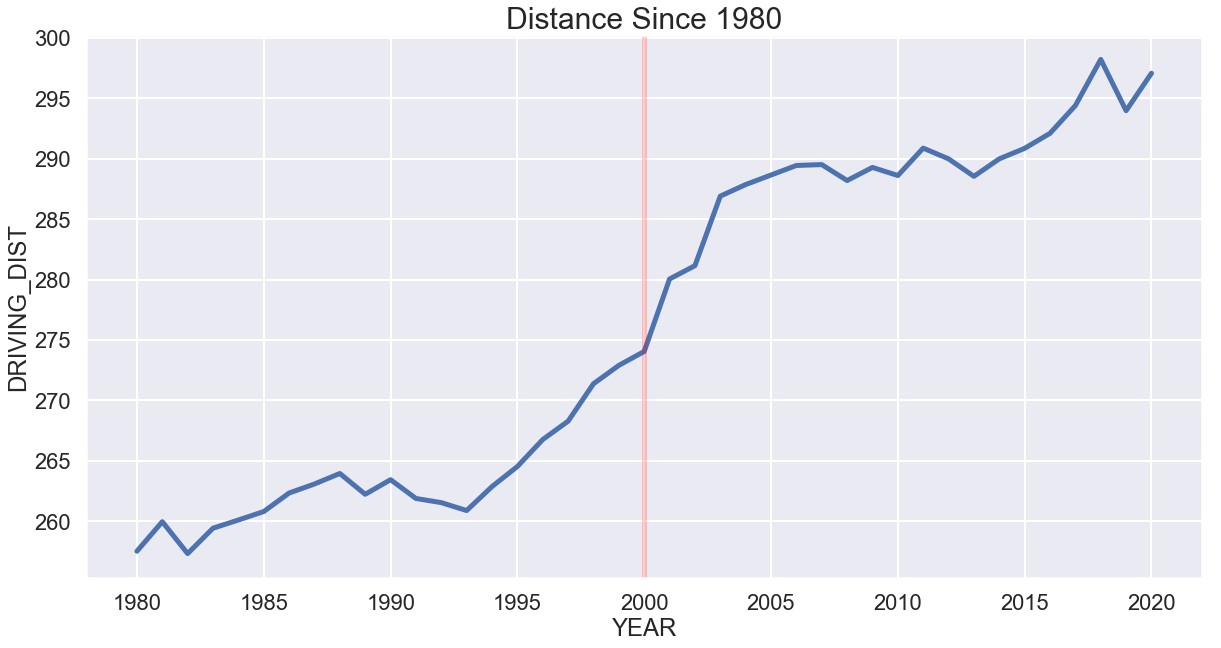

In [6]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set_context("poster", rc={"lines.linewidth": 5})

year_avg_df = df.groupby('YEAR', as_index=False)['DRIVING_DIST'].mean()
        
sns.lineplot(data=year_avg_df, x='YEAR', y='DRIVING_DIST')
plt.title('Distance Since 1980', size=30)
plt.axvline(2000, color='red', alpha=0.2)

### Accuracy over time

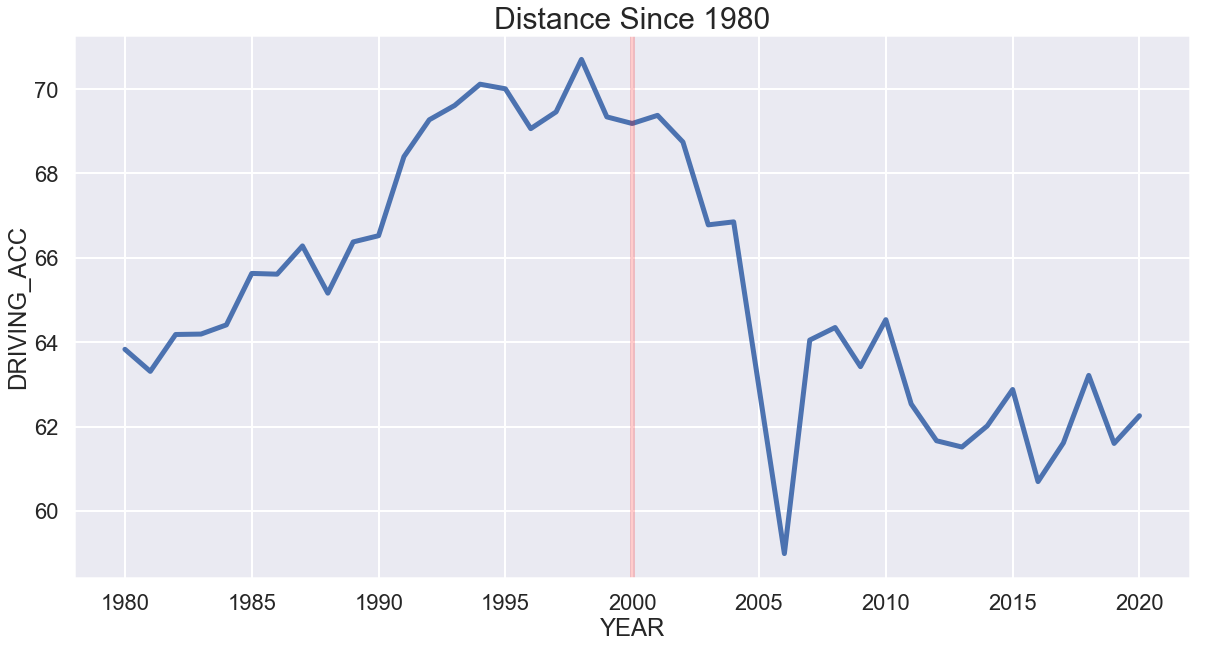

In [7]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set_context("poster", rc={"lines.linewidth": 5})

year_avg_df = df.groupby('YEAR', as_index=False)['DRIVING_ACC'].mean()
        
sns.lineplot(data=year_avg_df, x='YEAR', y='DRIVING_ACC')
plt.title('Distance Since 1980', size=30)
plt.axvline(2000, color='red', alpha=0.2)

### Off tee: Distance and Accuracy

In [8]:
# Groupby for distance and accuracy
year_dist_df = df.groupby('YEAR', as_index=False)['DRIVING_DIST'].mean()
year_acc_df = df.groupby('YEAR', as_index=False)['DRIVING_ACC'].mean()

# Combine DFs
mini_df = year_dist_df.merge(year_acc_df)
mini_df.head()

,YEAR,DRIVING_DIST,DRIVING_ACC
0,1980,257.521122,63.830585
1,1981,259.963758,63.307169
2,1982,257.325528,64.181962
3,1983,259.427561,64.191745
4,1984,260.103681,64.409969


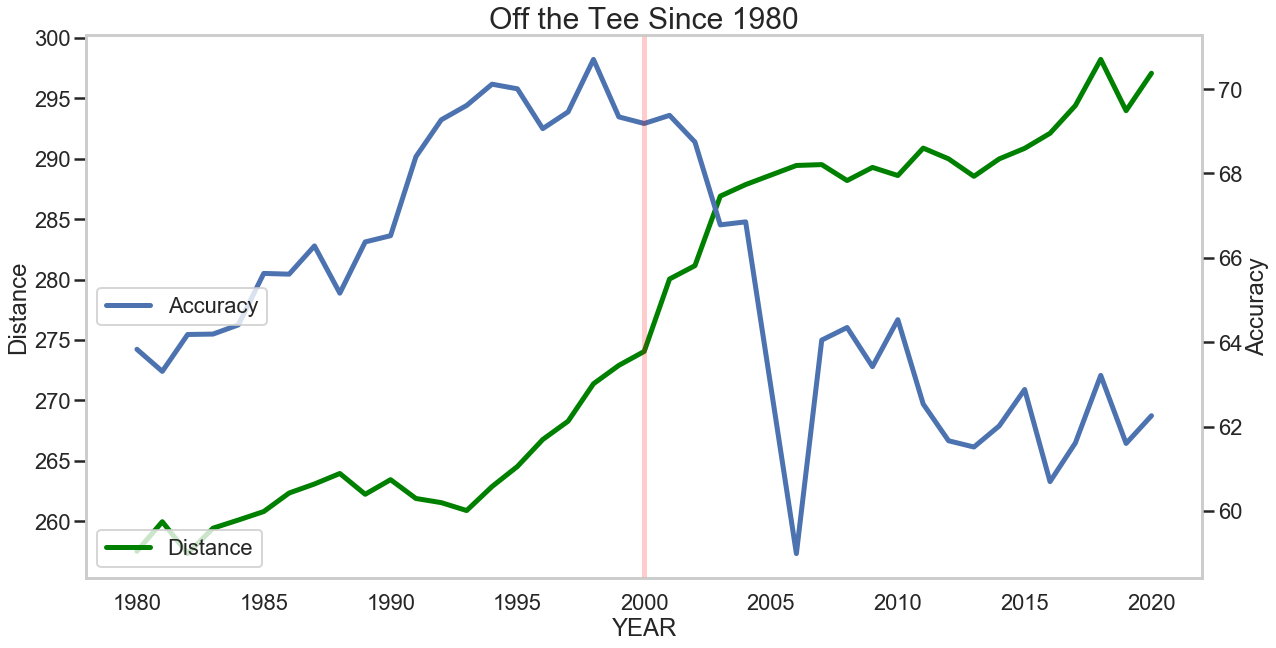

In [9]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set_context("poster", rc={"lines.linewidth": 5})

sns.set_style('whitegrid')

ax = sns.lineplot(data=mini_df, x='YEAR', y='DRIVING_DIST', color='green')
ax2 = ax.twinx()
sns.lineplot(data=mini_df, x='YEAR', y='DRIVING_ACC')

ax.legend(labels=['Distance'], loc='lower left')
ax2.legend(labels=['Accuracy'], loc='center left',)

ax.grid(False)
ax2.grid(False)

ax.set_ylabel('Distance')
ax2.set_ylabel('Accuracy')

plt.title('Off the Tee Since 1980', size=30)
plt.axvline(2000, color='red', alpha=0.2)


plt.show()



### Look at correlation between distance and accuracy

In [10]:
# Groupby player each year
player_dist_df = df.groupby(['PLAYER NAME', 'YEAR'], as_index=False)['DRIVING_DIST'].mean()
player_acc_df = df.groupby(['PLAYER NAME', 'YEAR'], as_index=False)['DRIVING_ACC'].mean()

# Combine DFs
player_df = player_dist_df.merge(player_acc_df)
player_df.head()


,PLAYER NAME,YEAR,DRIVING_DIST,DRIVING_ACC
0,A.J. Duncan,1988,283.5,58.930
1,A.J. Duncan,1990,264.1,44.640
2,A.J. McInerney,2018,298.5,50.000
3,Aaron Baddeley,2000,283.6,64.290
4,Aaron Baddeley,2001,273.3,54.465


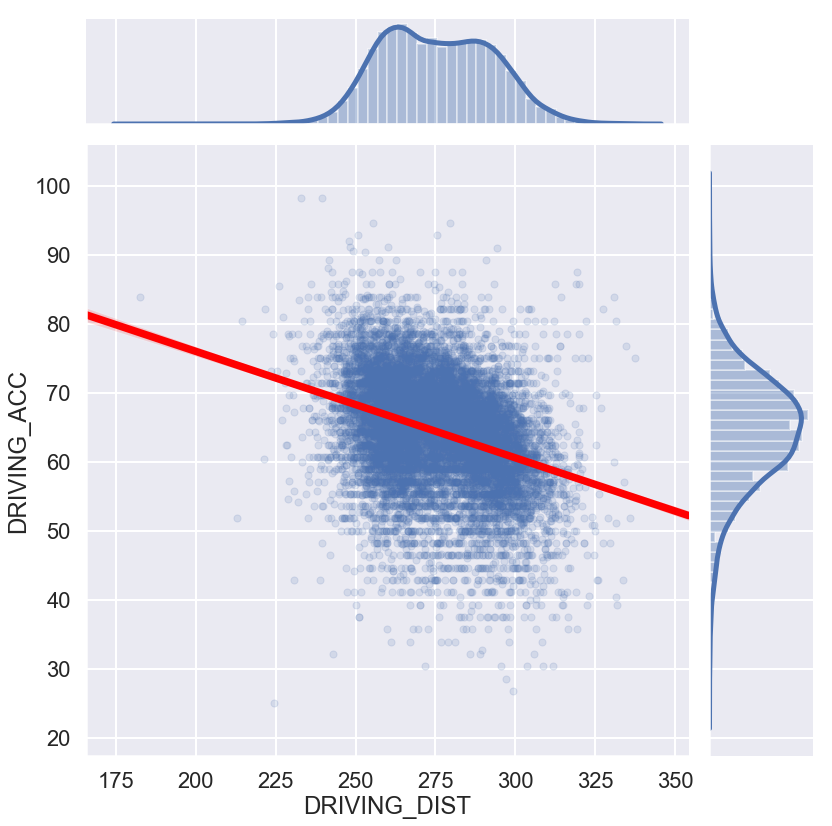

In [11]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set_context("poster", rc={"lines.linewidth": 5})

sns.jointplot("DRIVING_DIST", "DRIVING_ACC", height=12, data=player_df, kind='reg', 
              scatter_kws={'alpha':0.15, "s": 50}, line_kws={'color': 'red'})


### Look at correlation coefficients

In [12]:
# All years
df['DRIVING_DIST'].corr(df['DRIVING_ACC'])

-0.2736980059963966

In [13]:
# Correlation for 1980
df_1980 = df[df['YEAR'] == 1980]

df_1980['DRIVING_DIST'].corr(df_1980['DRIVING_ACC'])

-0.24440830154363935

In [14]:
# Correlation for 2020
df_2020 = df[df['YEAR'] == 2020]

df_2020['DRIVING_DIST'].corr(df_2020['DRIVING_ACC'])

-0.33661416244837605

### Compare 1980 and and 2019 graphically

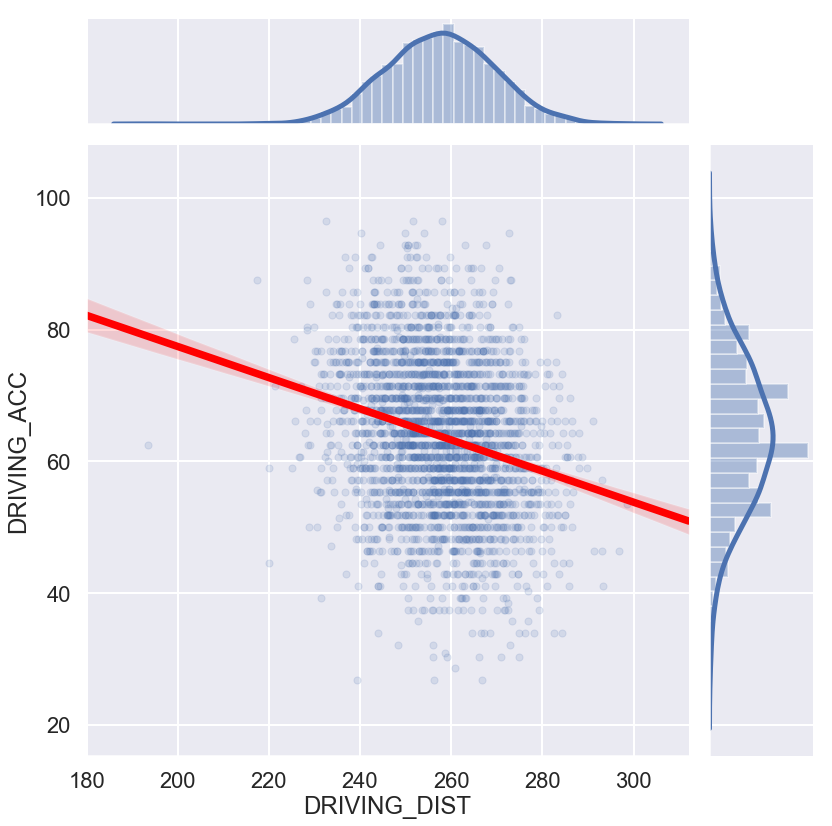

In [20]:
# 1980
sns.set_context("poster", rc={"lines.linewidth": 5})

sns.jointplot("DRIVING_DIST", "DRIVING_ACC", height=12, data=df_1980, kind='reg', 
              scatter_kws={'alpha':0.15, "s": 50}, line_kws={'color': 'red'})

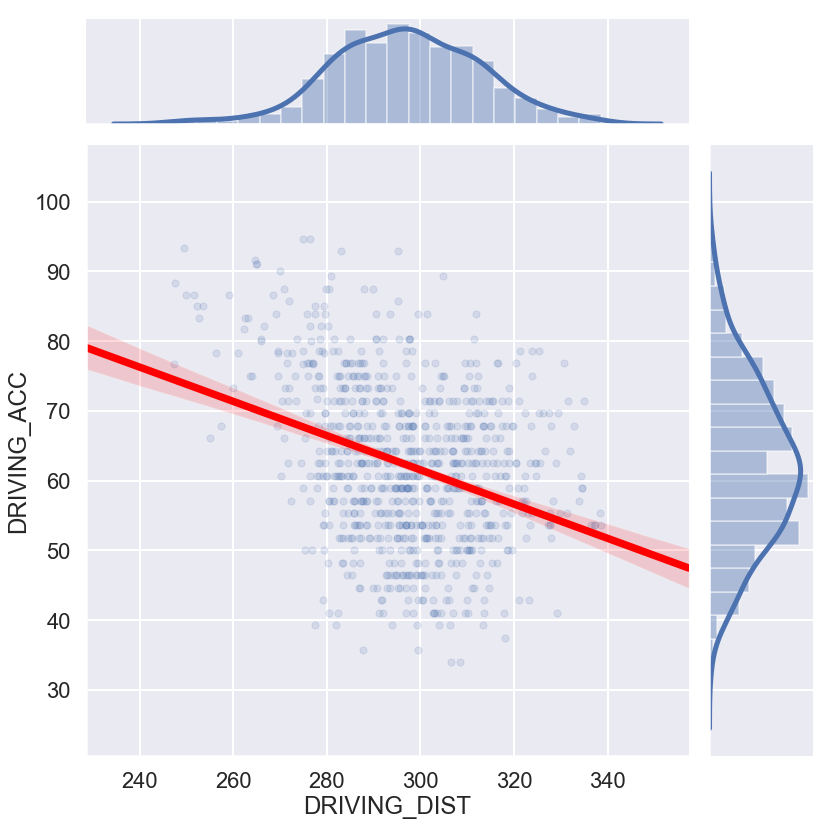

In [22]:
# 2020
sns.set_context("poster", rc={"lines.linewidth": 5})

sns.jointplot("DRIVING_DIST", "DRIVING_ACC", height=12, data=df_2020, kind='reg', 
              scatter_kws={'alpha':0.15, "s": 50}, line_kws={'color': 'red'})

In [26]:
### Correlation over time
years = list(range(1980,2021))
correlations = []

for yr in years:
    df_yr = df[df['YEAR'] == yr]
    corrs = df_yr['DRIVING_DIST'].corr(df_yr['DRIVING_ACC'])
    correlations.append(corrs)
    
list_of_tuples = list(zip(years, correlations))
df_corr = pd.DataFrame(list_of_tuples, columns = ['Year', 'Correlation']) 
df_corr.head()

,Year,Correlation
0,1980,-0.244408
1,1981,-0.325846
2,1982,-0.209234
3,1983,-0.223659
4,1984,-0.216448


Text(0.5, 1.0, 'Correlation between Distance and Accuracy Off the Tee')

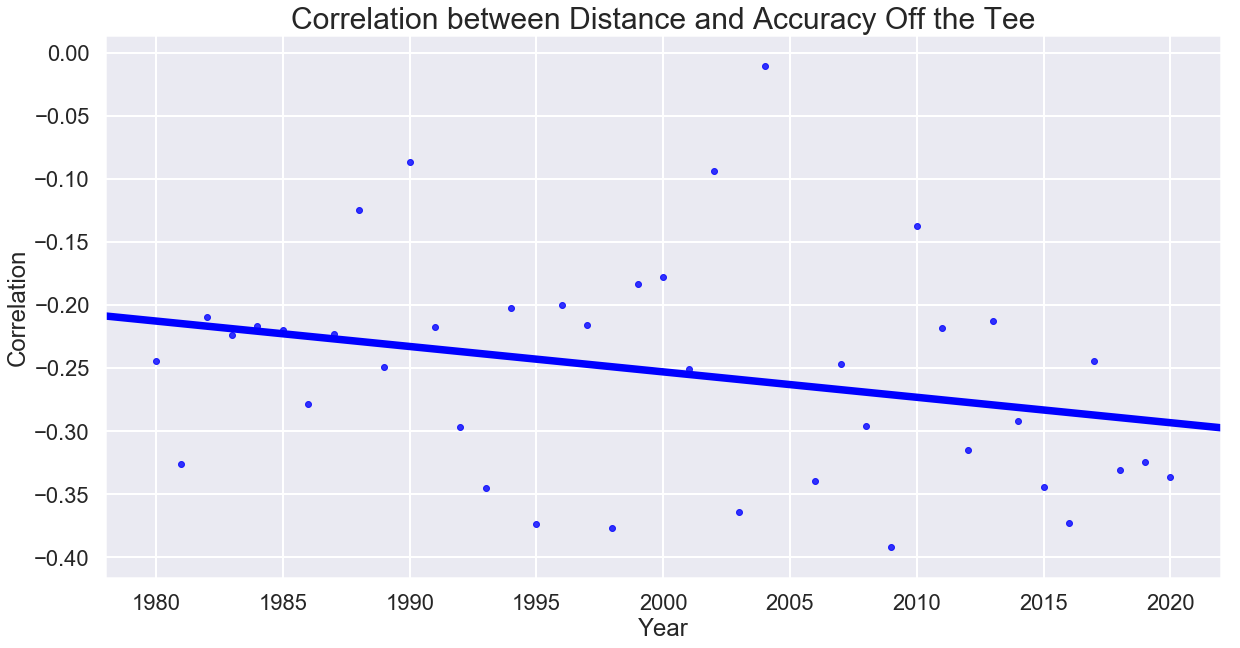

In [27]:
# Plot correlations over time
ax = sns.regplot(data=df_corr, x='Year', y='Correlation', color='blue', marker=".", ci=False)
plt.title('Correlation between Distance and Accuracy Off the Tee', size=30)


Since 1980 to 2020, the trend has been that players are giving up more accuracy for distance. For example, in 1980, a player gave up approximately 2.5% fairway accuracy for each additional 10 yards they gained. But in 2020, a player will need to give up almost an additional 1% decrease in accuracy off the tee to gain 10 yards. This makes sense when we think about it for a moment. Players hit it longer and a 5 degree miss with the driver will be further off line at 300 yards out than it is at 250 yards out. This is simple geometry; the further one travels from a line at an angle, the further that person will be from the other line. 

### What does distance and accuracy look li